In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
roses = os.listdir('flower_photos/roses/')

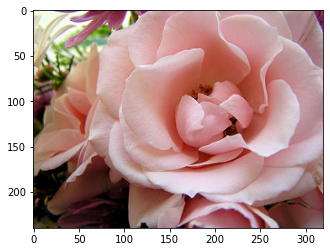

In [3]:
img = mpimg.imread('flower_photos/roses/12240303_80d87f77a3_n.jpg')
imgplt = plt.imshow(img)
plt.show()

# Preparing The data

In [4]:
data_dir = 'flower_photos/'

In [5]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


# Displaying The Images of Flowers

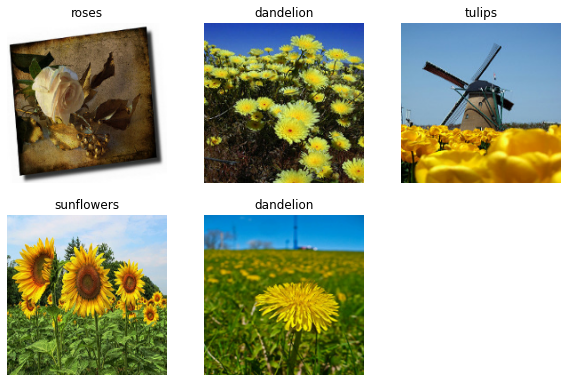

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(5):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Building The Model

In [9]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(64, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))

In [10]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrapp  (None, 2048)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 64)               131136    
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 5)                325       
 pper)                                                           
                                                                 
Total params: 23,719,173
Trainable params: 131,461
Non-trainable params: 23,587,712
______________________________________

# Compiling The Model

In [11]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Training The Model

In [12]:
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 212s 2s/step - loss: 0.6457 - accuracy: 0.7681 - val_loss: 0.4007 - val_accuracy: 0.8488
Epoch 2/10
92/92 [==============================] - 193s 2s/step - loss: 0.2962 - accuracy: 0.8988 - val_loss: 0.3741 - val_accuracy: 0.8597
Epoch 3/10
92/92 [==============================] - 193s 2s/step - loss: 0.2086 - accuracy: 0.9271 - val_loss: 0.3862 - val_accuracy: 0.8651
Epoch 4/10
92/92 [==============================] - 193s 2s/step - loss: 0.1378 - accuracy: 0.9581 - val_loss: 0.3825 - val_accuracy: 0.8638
Epoch 5/10
92/92 [==============================] - 194s 2s/step - loss: 0.1117 - accuracy: 0.9663 - val_loss: 0.4173 - val_accuracy: 0.8651
Epoch 6/10
92/92 [==============================] - 193s 2s/step - loss: 0.0723 - accuracy: 0.9796 - val_loss: 0.4062 - val_accuracy: 0.8665
Epoch 7/10
92/92 [==============================] - 211s 2s/step - loss: 0.0471 - accuracy: 0.9925 - val_loss: 0.4114 - val_accuracy: 0.8665
Epoch 8/10
92

# Evaluating The Model

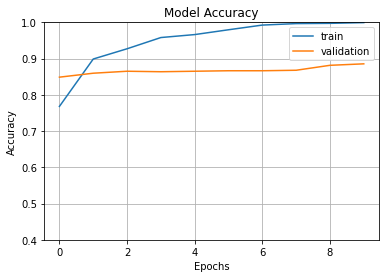

In [13]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

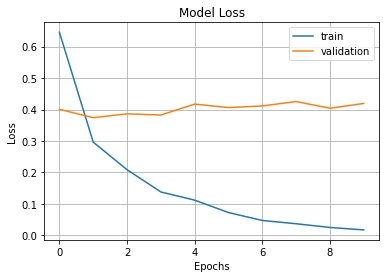

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Prediction Model

In [29]:
import cv2

In [30]:
def predictImg(input_image_path):
    input_image = cv2.imread(input_image_path)

    input_image_resize = cv2.resize(input_image, (img_height, img_width))

    image_reshaped = np.reshape(input_image_resize, [1, img_height, img_width, 3])

    input_prediction = resnet_model.predict(image_reshaped)

    input_pred_label = np.argmax(input_prediction)

    print("The predicted class is: ", class_names[input_pred_label])

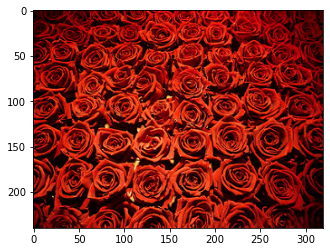

1/1 [==============================] - 0s 107ms/step
The predicted class is:  roses


In [31]:
img = mpimg.imread('flower_photos/roses/388405293_4db1d71f21_n.jpg')
imgplt = plt.imshow(img)
plt.show()

predictImg('flower_photos/roses/388405293_4db1d71f21_n.jpg')

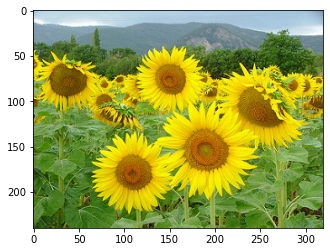

1/1 [==============================] - 0s 108ms/step
The predicted class is:  sunflowers


In [32]:
img = mpimg.imread('flower_photos/sunflowers/200557979_a16112aac1_n.jpg')
imgplt = plt.imshow(img)
plt.show()

predictImg('flower_photos/sunflowers/200557979_a16112aac1_n.jpg')